In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [2]:
x = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [5]:
dataset = tf.data.Dataset.range(10)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [6]:
dataset = dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)


In [7]:
dataset = dataset.map(lambda x: x * 2)

In [8]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)


In [9]:
dataset = dataset.apply(tf.data.experimental.unbatch())

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [10]:
dataset = dataset.filter(lambda x: x < 10)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [11]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [12]:
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)
x_mean = scaler.mean_
x_std = scaler.scale_

In [14]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")
    
    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, 'wt', encoding='utf-8') as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [15]:
train_data = np.c_[x_train, y_train]
valid_data = np.c_[x_valid, y_valid]
test_data = np.c_[x_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [16]:
import pandas as pd
pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [17]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [18]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [19]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [20]:
filepath_dataset

<ShuffleDataset shapes: (), types: tf.string>

In [21]:
lst = []
for item in filepath_dataset:
    lst += [item.numpy().decode('utf-8')]

In [22]:
n_readers = 5
dataset = filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
                                     cycle_length=n_readers)

In [23]:
n_inputs = 8

def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - x_mean) / x_std, y

In [24]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [25]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None,
                      shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1), 
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_read_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [26]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [28]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
batch_size = 32
model.fit(train_set, epochs=10, steps_per_epoch=len(x_train) // batch_size, validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 1s 2ms/step - loss: 1.6435 - val_loss: 0.7933
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: 0.7066 - val_loss: 0.6534
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6290 - val_loss: 0.6088
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5908 - val_loss: 0.5678
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5442 - val_loss: 0.5376
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5713 - val_loss: 0.5176
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5373 - val_loss: 0.4993
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5182 - val_loss: 0.5013
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: 0.4937 - val_loss: 0.4691
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: 0.4636 - val_loss: 0.4571

In [1]:
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

NameError: name 'tf' is not defined

In [31]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [32]:
options = tf.io.TFRecordOptions(compression_type='GZIP')
with tf.io.TFRecordWriter('my_compressed.tfrecord', options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [34]:
dataset = tf.data.TFRecordDataset(['my_compressed.tfrecord'], compression_type='GZIP')
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [2]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Overwriting person.proto


In [3]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [10]:
!Is person*

'Is'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [11]:
from person_pb2 import Person

person = Person(name='AI', id=123, email=['a@b.com'])
print(person)

name: "AI"
id: 123
email: "a@b.com"



In [12]:
person.name

'AI'

In [13]:
person.name='Alice'
person.email[0]

'a@b.com'

In [14]:
person.email.append('c@d.com')

In [15]:
s = person.SerializeToString()
s

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [16]:
person2 = Person()
person2.ParseFromString(s)

27

In [17]:
person == person2

True

In [5]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b'Alice'])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b'a@b.com', b'c@d.com']))
        }
    )
)

In [6]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [8]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string)
}

for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

In [9]:
vocab = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [10]:
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)

In [12]:
table_init

In [13]:
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

In [14]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)

In [15]:
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [16]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)

In [17]:
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [18]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)

In [19]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.7230369 , 0.39920306],
       [0.92811704, 0.8523536 ],
       [0.9702226 , 0.2862773 ],
       [0.3358699 , 0.26669073],
       [0.36563587, 0.9234767 ],
       [0.34648645, 0.29476976],
       [0.90271723, 0.30463648]], dtype=float32)>

In [20]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)

In [21]:
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [22]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.3358699 , 0.26669073],
       [0.34648645, 0.29476976],
       [0.92811704, 0.8523536 ],
       [0.92811704, 0.8523536 ]], dtype=float32)>

In [23]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets, 
                                  output_dim = embedding_dim)
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.02716175,  0.03295377],
       [ 0.04791096,  0.02315411],
       [ 0.01688908,  0.0195048 ],
       [ 0.01688908,  0.0195048 ]], dtype=float32)>

In [24]:
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)
cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories], outputs=[outputs])

In [25]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None,)              0           input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 2)            12          lambda[0][0]                     
_______________________________________________________________________________________

In [1]:
import tensorflow_transform as tft

In [ ]:
def preprocess(inputs):
    median_age = inputs["housing_median_age"]
    ocean_proximity = inputs['ocean_proximity']
    standardized_age = tft.scale_to_z_score(median_age)
    ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
    return {
        "standardized_median_age": standardized_age,
        "ocean_proximity_id": ocean_proximity_id
    }

In [3]:
import tensorflow_datasets as tfds

In [4]:
dataset = tfds.load(name='mnist')
mnist_train, mnist_test = dataset['train'], dataset['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to C:\Users\sinjy\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


# 연습문제 9 번

## a.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train))
valid_set = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [5]:
def create_example(image, label):
    image_data = tf.io.serialize_tensor(image)
    return Example(
        features=Features(
            feature={
                "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
                "label": Feature(int64_list=Int64List(value=[label]))
            }))

In [25]:
for image, label in valid_set.take(1):
    print(create_example(image, label))

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\rI\000\000\001\004\000\000\000\000\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000$\210\177>6\000\000\000\001\003\004\000\000\003\000\000\000\000\000\000\000\000\000\000\000\000\006\000f\314\260\206\220{\027\000\000\000\000\014\n\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\233\354\317\262k\234\241m@\027M\202H\017\000\000\000\000\000\000\000\000\000\000\000\001\000E\317\337\332\330\330\243\177yz\222\215X\254B\000\000\00

In [28]:
from contextlib import ExitStack

def write_tfrecords(name, dataset, n_shards=10):
    paths = ['{}.tfrecord-{:05d}-of-{:05d}'.format(name, index, n_shards)
            for index in range(n_shards)]
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path))
                  for path in paths]
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = create_example(image, label)
            writers[shard].write(example.SerializeToString())
    return paths

In [30]:
train_filepaths = write_tfrecords("my_fashion_mnist.train", train_set)
valid_filepaths = write_tfrecords("my_fashion_mnist.valid", valid_set)
test_filepaths = write_tfrecords("my_fashion_mnist.test", test_set)

In [31]:
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1)
    }
    example =tf.io.parse_single_example(tfrecord, feature_descriptions)
    image = tf.io.parse_tensor(example['image'], out_type=tf.uint8)
    image = tf.reshape(image, shape=[28, 28])
    return image, example['label']

In [32]:
def mnist_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None,
                 n_parse_threads=5, batch_size=32, cache=True):
    dataset = tf.data.TFRecordDataset(filepaths,
                                     num_parallel_reads=n_parse_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [33]:
train_set = mnist_dataset(train_filepaths, shuffle_buffer_size=60000)
valid_set = mnist_dataset(valid_filepaths)
test_set = mnist_dataset(test_filepaths)

(32, 28, 28) (32,)


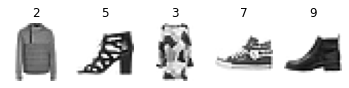

In [35]:
import matplotlib.pyplot as plt
for x, y in train_set.take(1):
    print(x.shape, y.shape)
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(x[i].numpy(), cmap='binary')
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [38]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())
    
standardization = Standardization(input_shape=[28, 28])

sample_image_batches = train_set.take(100).map(lambda image, label: image)
sample_images = np.concatenate(list(sample_image_batches.as_numpy_iterator()), 
                              axis=0).astype(np.float32)
standardization.adapt(sample_images)

model = keras.models.Sequential([
    standardization,
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam', metrics=['accuracy'])

In [41]:
from datetime import datetime
import os
logs = os.path.join(os.curdir, "my_logs",
                   "run_" + datetime.now().strftime("%Y%m%d_%H%M%S"))
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch=10)
model.fit(train_set, epochs=5, validation_data=valid_set,
         callbacks=[tensorboard_cb])

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5837 - accuracy: 0.8065 - val_loss: 0.5892 - val_accuracy: 0.8624
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.8769 - val_loss: 0.4070 - val_accuracy: 0.8730
Epoch 3/5
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3313 - accuracy: 0.8930 - val_loss: 0.4155 - val_accuracy: 0.8750
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9034 - val_loss: 0.4100 - val_accuracy: 0.8866
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9101 - val_loss: 0.3720 - val_accuracy: 0.8838


# 연습문제 10

## a.

In [2]:
import tensorflow as tf
from tensorflow import keras
from pathlib import Path

DOWNLOAD_ROOT = "http://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME = "aclImdb_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path = Path(filepath).parent / "aclImdb"
path

WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb')

In [3]:
import os
for name, subdirs, files in os.walk(path):
    print(name, subdirs, files)
    print(Path(name).parts)
    print(path.parts)
    break

C:\Users\sinjy\.keras\datasets\aclImdb ['test', 'train'] ['imdb.vocab', 'imdbEr.txt', 'README']
('C:\\', 'Users', 'sinjy', '.keras', 'datasets', 'aclImdb')
('C:\\', 'Users', 'sinjy', '.keras', 'datasets', 'aclImdb')


In [4]:
os.sep

'\\'

In [5]:
for name, subdirs, files in os.walk(path):
    indent = len(Path(name).parts) - len(path.parts)
    print("    " * indent + Path(name).parts[-1] + os.sep)
    for index, filename in enumerate(sorted(files)):
        if index == 3:
            print("    " * (indent + 1) + "...")
            break
        print("    " * (indent + 1) + filename)

aclImdb\
    README
    imdb.vocab
    imdbEr.txt
    test\
        labeledBow.feat
        urls_neg.txt
        urls_pos.txt
        neg\
            0_2.txt
            10000_4.txt
            10001_1.txt
            ...
        pos\
            0_10.txt
            10000_7.txt
            10001_9.txt
            ...
    train\
        labeledBow.feat
        unsupBow.feat
        urls_neg.txt
        ...
        neg\
            0_3.txt
            10000_4.txt
            10001_4.txt
            ...
        pos\
            0_9.txt
            10000_8.txt
            10001_10.txt
            ...
        unsup\
            0_0.txt
            10000_0.txt
            10001_0.txt
            ...


In [7]:
list(path.glob('*'))

[WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb/imdb.vocab'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb/imdbEr.txt'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb/README'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb/test'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/aclImdb/train')]

In [8]:
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")]

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [11]:
import numpy as np
np.random.shuffle(test_valid_pos)

In [12]:
test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]
valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

In [28]:
def imdb_dataset(filepaths_positive, filepaths_negative):
    reviews = []
    labels = []
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        for filepath in filepaths:
            with open(filepath, encoding='UTF-8') as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    return tf.data.Dataset.from_tensor_slices((tf.constant(reviews), 
                                              tf.constant(labels)))

In [29]:
for x, y in imdb_dataset(train_pos, train_neg).take(3):
    print(x)
    print(y)
    print()

tf.Tensor(b"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor(b"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public a

In [30]:
%timeit -r1 for x, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

26.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
def imdb_dataset(filepaths_positive, filepaths_negative, n_read_threads=5):
    dataset_neg = tf.data.TextLineDataset(filepaths_negative, 
                                          num_parallel_reads=n_read_threads)
    dataset_neg = dataset_neg.map(lambda review: (review, 0))
    dataset_pos = tf.data.TextLineDataset(filepaths_positive, 
                                         num_parallel_reads = n_read_threads)
    dataset_pos = dataset_pos.map(lambda review: (review, 1))
    return tf.data.Dataset.concatenate(dataset_pos, dataset_neg)

In [32]:
%timeit -r1 for x, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

47.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
%timeit -r1 for x, y in imdb_dataset(train_pos, train_neg).cache().repeat(10): pass

20.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
batch_size = 32

train_set = imdb_dataset(train_pos, train_neg).shuffle(25000).batch(batch_size).prefetch(1)
valid_set = imdb_dataset(valid_pos, valid_neg).batch(batch_size).prefetch(1)
test_set = imdb_dataset(test_pos, test_neg).batch(batch_size).prefetch(1)

In [36]:
def preprocess(x_batch, n_words=50):
    shape = tf.shape(x_batch) * tf.constant([1, 0]) + tf.constant([0, n_words])
    z = tf.strings.substr(x_batch, 0, 300)
    z = tf.strings.lower(z)
    z = tf.strings.regex_replace(z, b"<br\\s*/?>", b" ")
    z = tf.strings.regex_replace(z, b"[^a-z]", b" ")
    z = tf.strings.split(z)
    return z.to_tensor(shape=shape, default_value=b"<pad>")

In [37]:
x_example = tf.constant(["It's a great, great movie! I loved it.", "It was terrible, run away!!!"])
preprocess(x_example)

<tf.Tensor: shape=(2, 50), dtype=string, numpy=
array([[b'it', b's', b'a', b'great', b'great', b'movie', b'i', b'loved',
        b'it', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>'],
       [b'it', b'was', b'terrible', b'run', b'away', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'

In [42]:
from collections import Counter

def get_vocabulary(data_sample, max_size=1000):
    preprocessed_reviews = preprocess(data_sample).numpy()
    counter = Counter()
    for words in preprocessed_reviews:
        for word in words:
            if word != b"<pad>":
                counter[word] += 1
    return [b"<pad>"] + [word for word, count in counter.most_common(max_size)]

In [43]:
get_vocabulary(x_example)

[b'<pad>',
 b'it',
 b'great',
 b's',
 b'a',
 b'movie',
 b'i',
 b'loved',
 b'was',
 b'terrible',
 b'run',
 b'away']

In [46]:
class TextVectorization(keras.layers.Layer):
    def __init__(self, max_vocabulary_size=1000, n_oov_buckets=100, 
                 dtype=tf.string, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.max_vocabulary_size = max_vocabulary_size
        self.n_oov_buckets = n_oov_buckets
    
    def adapt(self, data_sample):
        self.vocab = get_vocabulary(data_sample, self.max_vocabulary_size)
        words = tf.constant(self.vocab)
        word_ids = tf.range(len(self.vocab), dtype=tf.int64)
        vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
        self.table = tf.lookup.StaticVocabularyTable(vocab_init, self.n_oov_buckets)
    
    def call(self, inputs):
        preprocessed_inputs = preprocess(inputs)
        return self.table.lookup(preprocessed_inputs)

In [47]:
text_vectorization = TextVectorization()
text_vectorization.adapt(x_example)
text_vectorization(x_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[ 1,  3,  4,  2,  2,  5,  6,  7,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  8,  9, 10, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]], dtype=int64)>

In [48]:
max_vocabulary_size = 1000
n_oov_buckets = 100

sample_review_batches = train_set.map(lambda review, label: review)
sample_reviews = np.concatenate(list(sample_review_batches.as_numpy_iterator()), 
                                axis=0)

In [49]:
sample_review_batches

<MapDataset shapes: (None,), types: tf.string>

In [52]:
sample_reviews.shape

(25000,)

In [53]:
text_vectorization = TextVectorization(max_vocabulary_size, n_oov_buckets, 
                                      input_shape=[])
text_vectorization.adapt(sample_reviews)

In [60]:
len(text_vectorization.vocab)

1001

In [54]:
text_vectorization(x_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[  9,  14,   2,  64,  64,  12,   5, 256,   9,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,  13, 269, 531, 335,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)>

In [55]:
text_vectorization.vocab[:10]

[b'<pad>', b'the', b'a', b'of', b'and', b'i', b'to', b'is', b'this', b'it']

In [56]:
simple_example = tf.constant([[1, 3, 1, 0, 0], [2, 2, 0, 0, 0]])
tf.reduce_sum(tf.one_hot(simple_example, 4), axis=1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[2., 2., 0., 1.],
       [3., 0., 2., 0.]], dtype=float32)>

In [57]:
class BagOfWords(keras.layers.Layer):
    def __init__(self, n_tokens, dtype=tf.int32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.n_tokens = n_tokens
    def call(self, inputs):
        one_hot = tf.one_hot(inputs, self.n_tokens)
        return tf.reduce_sum(one_hot, axis=1)[:, 1:]

In [58]:
bag_of_words = BagOfWords(n_tokens=4)
bag_of_words(simple_example)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 0., 1.],
       [0., 2., 0.]], dtype=float32)>

In [61]:
n_tokens = max_vocabulary_size + n_oov_buckets + 1
bag_of_words = BagOfWords(n_tokens)

In [62]:
model = keras.models.Sequential([
    text_vectorization,
    bag_of_words,
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='nadam',
             metrics=['accuracy'])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
782/782 [==============================] - 30s 34ms/step - loss: 0.5838 - accuracy: 0.6737 - val_loss: 0.5105 - val_accuracy: 0.7391
Epoch 2/5
782/782 [==============================] - 9s 8ms/step - loss: 0.4638 - accuracy: 0.7770 - val_loss: 0.5102 - val_accuracy: 0.7428
Epoch 3/5
782/782 [==============================] - 9s 8ms/step - loss: 0.4129 - accuracy: 0.8107 - val_loss: 0.5152 - val_accuracy: 0.7347
Epoch 4/5
782/782 [==============================] - 9s 8ms/step - loss: 0.3483 - accuracy: 0.8535 - val_loss: 0.5382 - val_accuracy: 0.7346
Epoch 5/5
782/782 [==============================] - 9s 8ms/step - loss: 0.2641 - accuracy: 0.9071 - val_loss: 0.5761 - val_accuracy: 0.7309


In [72]:
def compute_mean_embedding(inputs):
    not_pad = tf.math.count_nonzero(inputs, axis=-1)
    n_words = tf.math.count_nonzero(not_pad, axis=-1, keepdims=True)
    sqrt_n_words = tf.math.sqrt(tf.cast(n_words, tf.float32))
    return tf.reduce_mean(inputs, axis=1) * sqrt_n_words

In [68]:
another_example = tf.constant([[[1., 2., 3.], [4., 5., 0.], [0., 0., 0.]],
                               [[6., 0., 0.], [0., 0., 0.], [0., 0., 0.]]])

In [70]:
tf.math.count_nonzero(tf.math.count_nonzero(another_example, axis=-1), axis=-1,
                     keepdims=True)

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[2],
       [1]], dtype=int64)>

In [66]:
another_example.shape

TensorShape([2, 3, 3])

In [73]:
tf.cast(tf.constant([[2], [1]]), tf.float32)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [1.]], dtype=float32)>

In [74]:
compute_mean_embedding(another_example)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2.3570225, 3.2998314, 1.4142135],
       [2.       , 0.       , 0.       ]], dtype=float32)>

In [77]:
embedding_size = 20
model = keras.models.Sequential([
    text_vectorization,
    keras.layers.Embedding(input_dim=n_tokens,
                          output_dim=embedding_size,
                          mask_zero=True),
    keras.layers.Lambda(compute_mean_embedding),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='nadam',
              metrics=['accuracy'])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
782/782 [==============================] - 7s 5ms/step - loss: 0.6057 - accuracy: 0.6517 - val_loss: 0.5138 - val_accuracy: 0.7386
Epoch 2/5
782/782 [==============================] - 6s 5ms/step - loss: 0.4917 - accuracy: 0.7553 - val_loss: 0.5076 - val_accuracy: 0.7394
Epoch 3/5
782/782 [==============================] - 6s 5ms/step - loss: 0.4804 - accuracy: 0.7638 - val_loss: 0.5191 - val_accuracy: 0.7340
Epoch 4/5
782/782 [==============================] - 6s 5ms/step - loss: 0.4734 - accuracy: 0.7628 - val_loss: 0.5083 - val_accuracy: 0.7413
Epoch 5/5
760/782 [============================>.] - ETA: 0s - loss: 0.4688 - accuracy: 0.7652